In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
fraud_data = pd.read_csv('Fraud_check.csv')

In [5]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
data = fraud_data.iloc[:,[0,1,3,4,5,2]]

In [7]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340
596,YES,Divorced,55369,2,YES,69967
597,NO,Divorced,154058,0,YES,47334
598,YES,Married,180083,17,NO,98592


In [8]:
Status = []
for i in data['Taxable.Income']:
    if i <= 30000:
        Status.append("Risky")
    else :
        Status.append('Good')
        

In [9]:
data['Status'] = Status

In [10]:
data.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Taxable.Income   600 non-null    int64 
 6   Status           600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [12]:
data.isnull().sum()
# No null values

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Taxable.Income     0
Status             0
dtype: int64

In [13]:
data[data.duplicated()]
# No duplicates

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status


In [15]:
data.corr(numeric_only=True)

,City.Population,Work.Experience,Taxable.Income
City.Population,1.000000,0.013135,-0.064387
Work.Experience,0.013135,1.000000,-0.001818
Taxable.Income,-0.064387,-0.001818,1.000000


<Axes: >

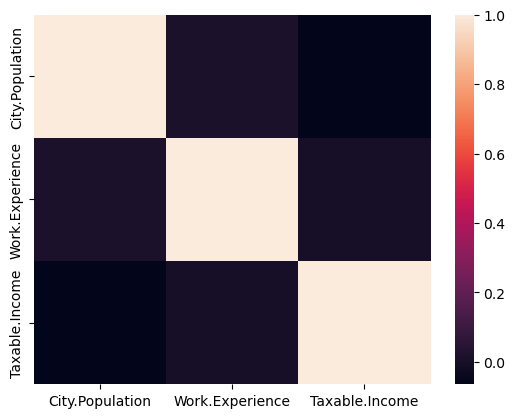

In [16]:
sns.heatmap(data.corr(numeric_only=True))

In [17]:
data['Undergrad'].value_counts(),data['Marital.Status'].value_counts(),data['Urban'].value_counts(),data['Status'].value_counts()
# Value counts of categorical columns

(Undergrad
 YES    312
 NO     288
 Name: count, dtype: int64,
 Marital.Status
 Single      217
 Married     194
 Divorced    189
 Name: count, dtype: int64,
 Urban
 YES    302
 NO     298
 Name: count, dtype: int64,
 Status
 Good     476
 Risky    124
 Name: count, dtype: int64)

In [18]:
data


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status
0,NO,Single,50047,10,YES,68833,Good
1,YES,Divorced,134075,18,YES,33700,Good
2,NO,Married,160205,30,YES,36925,Good
3,YES,Single,193264,15,YES,50190,Good
4,NO,Married,27533,28,NO,81002,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340,Good
596,YES,Divorced,55369,2,YES,69967,Good
597,NO,Divorced,154058,0,YES,47334,Good
598,YES,Married,180083,17,NO,98592,Good


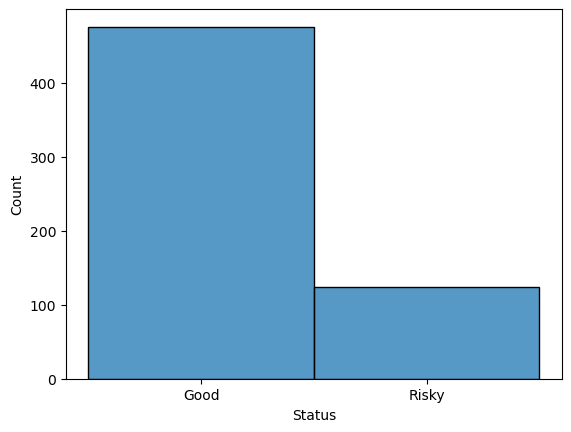

In [19]:
sns.histplot(data.Status);

<Axes: xlabel='City.Population', ylabel='Count'>

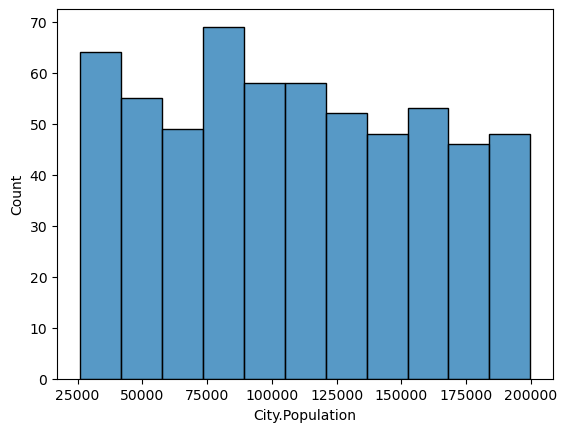

In [20]:
sns.histplot(data['City.Population'])

<Axes: xlabel='Marital.Status', ylabel='Count'>

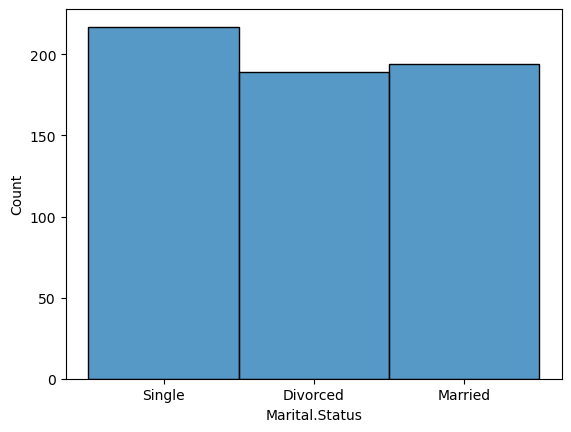

In [21]:
sns.histplot(data['Marital.Status'])

<Axes: xlabel='Taxable.Income', ylabel='Count'>

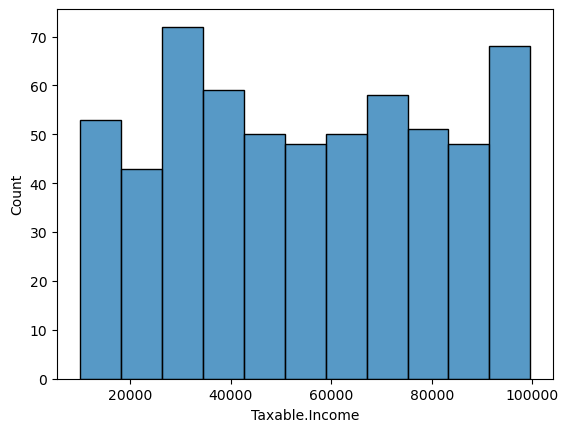

In [22]:
sns.histplot(data['Taxable.Income'])

<Axes: xlabel='Undergrad', ylabel='Count'>

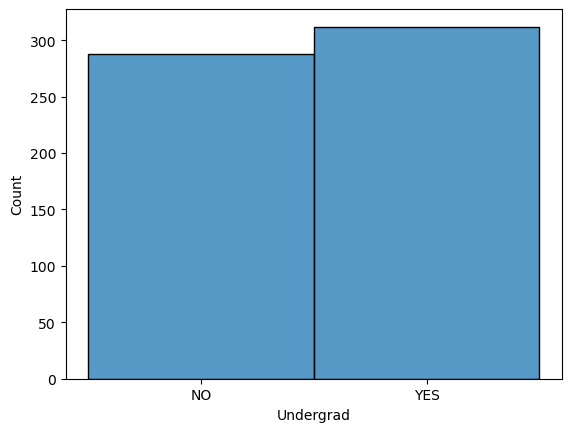

In [23]:
sns.histplot(data['Undergrad'])

<Axes: xlabel='Urban', ylabel='Count'>

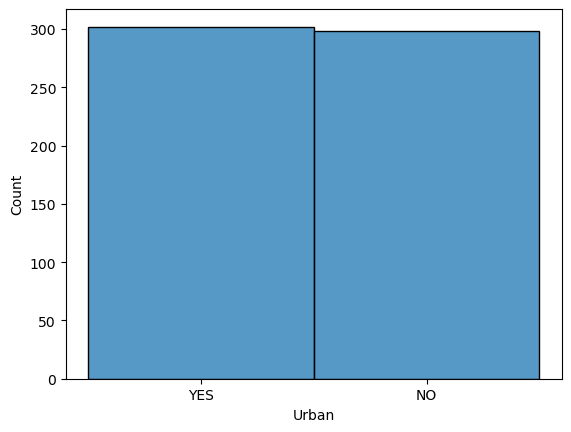

In [24]:
sns.histplot(data['Urban'])

<Axes: xlabel='Work.Experience', ylabel='Count'>

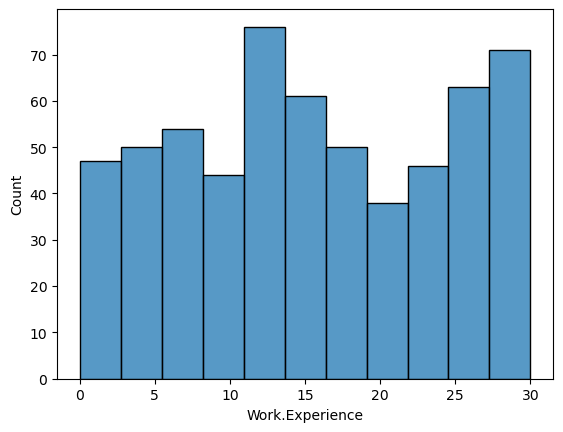

In [25]:
sns.histplot(data['Work.Experience'])

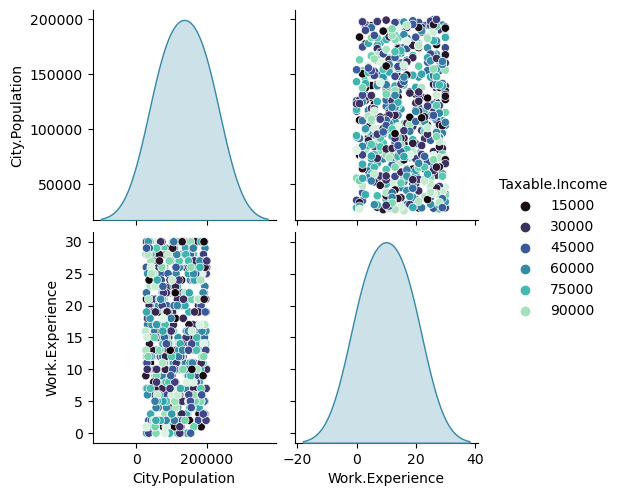

In [26]:
sns.pairplot(data,palette='mako',hue='Taxable.Income')

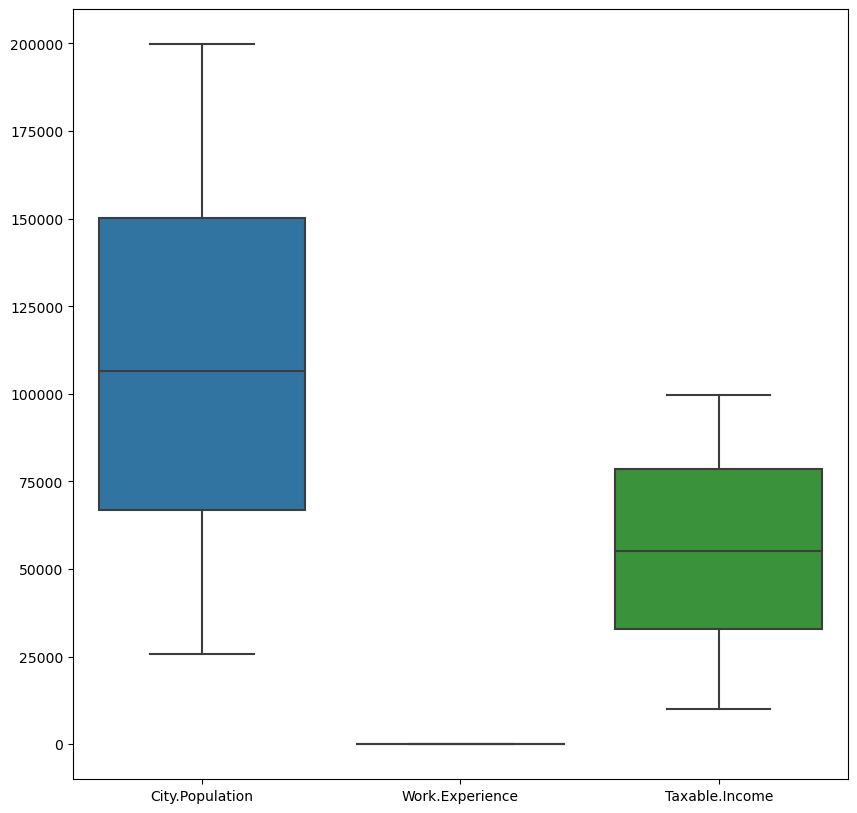

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient="v");

# Encoding the Categorical columns

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Urban'] = le.fit_transform(data['Urban'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])

In [29]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status
0,0,2,50047,10,1,68833,0
1,1,0,134075,18,1,33700,0
2,0,1,160205,30,1,36925,0
3,1,2,193264,15,1,50190,0
4,0,1,27533,28,0,81002,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,0
596,1,0,55369,2,1,69967,0
597,0,0,154058,0,1,47334,0
598,1,1,180083,17,0,98592,0


In [30]:
data['Status'].value_counts()

Status
0    476
1    124
Name: count, dtype: int64

In [31]:
X = data.iloc[:,:-2]
Y = data['Status']

In [32]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=42,test_size=0.2)


In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import ensemble
model = ensemble.RandomForestClassifier()



# Hyper parameters tuning

In [35]:
parameters = [{'n_estimators':[20,40,60,80,100],'max_depth':[5,10,15,20]},{'n_estimators':[20,30,40,60,100], 'max_depth': 
             [5,10,15],'max_features':[2,5,8,10]}]



# Grid Search CV

In [36]:
grid_search = GridSearchCV(estimator=model,param_grid=parameters,n_jobs=-1,cv=10)

grid = grid_search.fit(x_train,y_train)

grid.best_score_

0.7958333333333334

In [37]:
grid.best_params_
# We got best score at max_depth': 5, 'max_features': 2, 'n_estimators': 30


{'max_depth': 5, 'n_estimators': 20}

In [38]:
from sklearn import ensemble

In [39]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
rf = ensemble.RandomForestClassifier(max_depth=5,max_features=2)
dt = DecisionTreeClassifier(max_depth=5,max_features=2)

In [40]:
model1 = dt.fit(x_train,y_train)

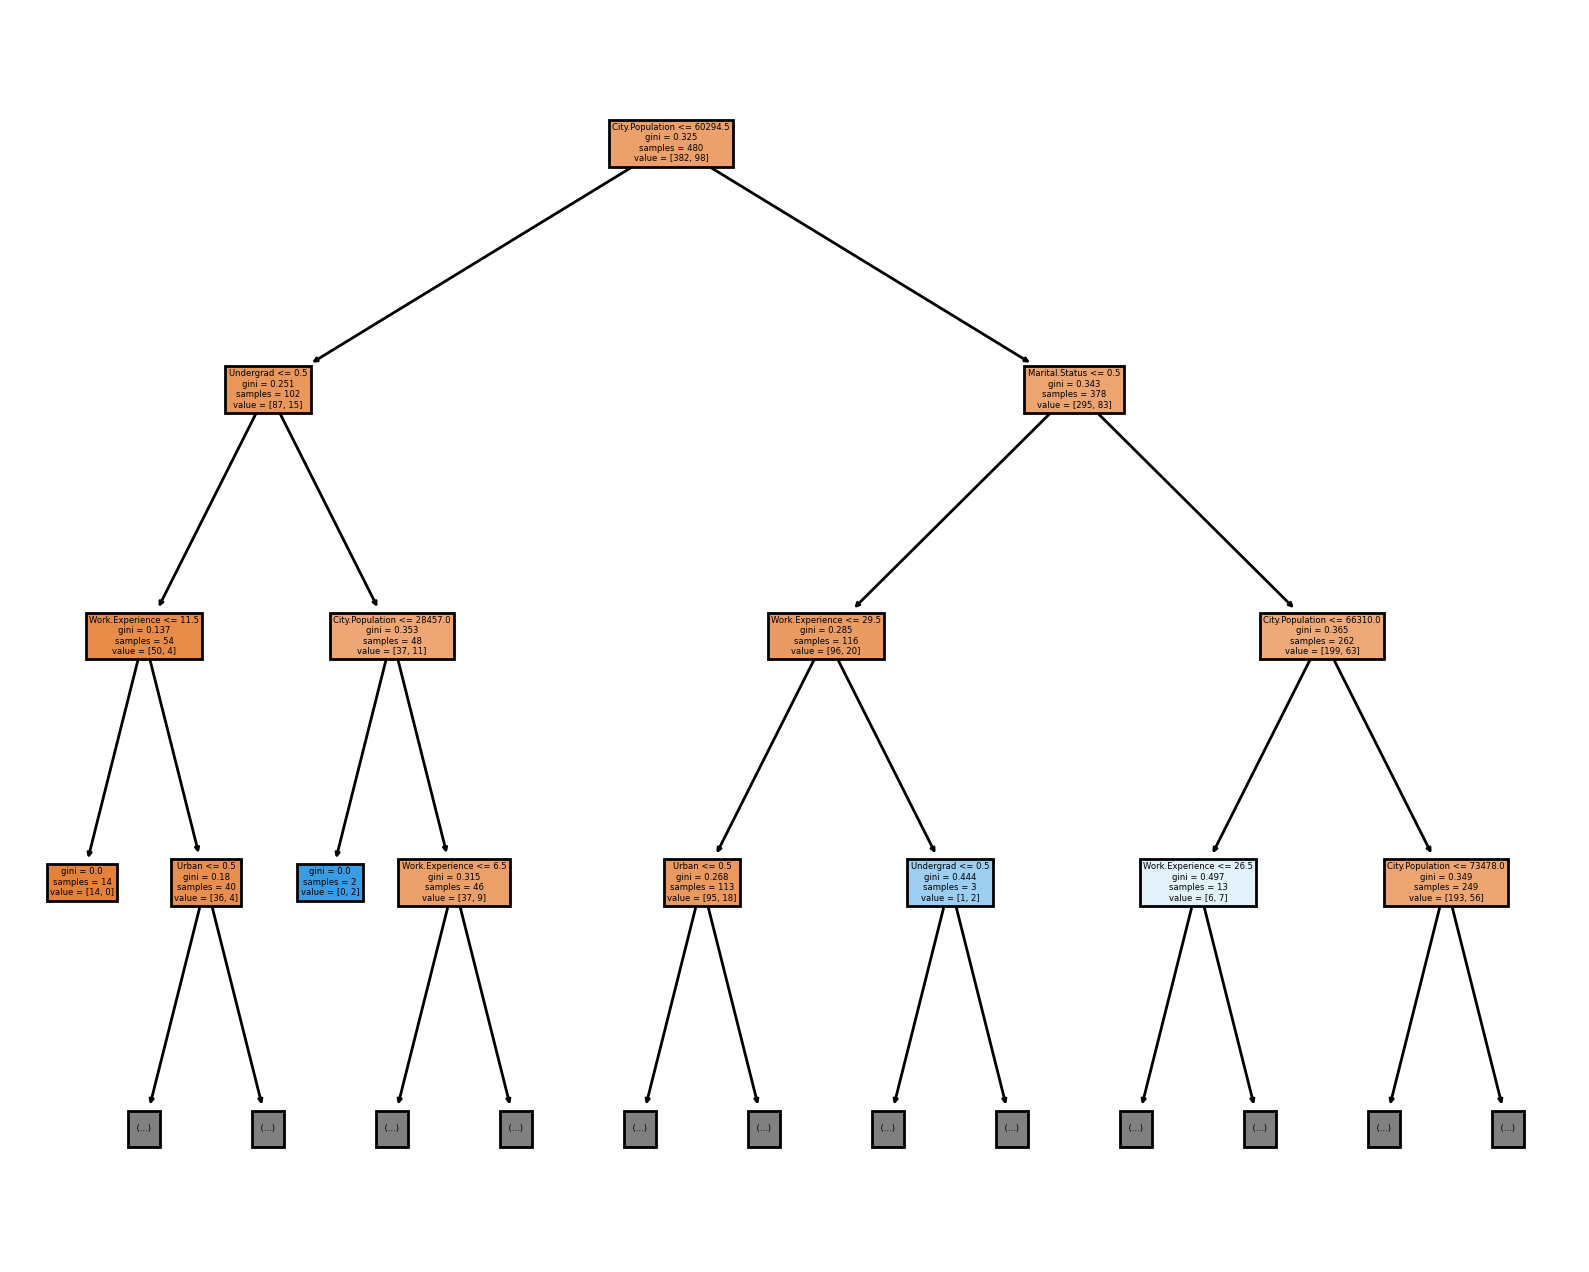

In [41]:
plt.figure(figsize=(10,8),dpi=200);
plot_tree(model1,feature_names=X.columns,filled=True,max_depth=3);

# Random SearchCV

In [42]:

random_search = RandomizedSearchCV(estimator=model,param_distributions=parameters,n_jobs=-1,cv = 10)

random = random_search.fit(x_train,y_train)

In [43]:
random.best_score_

0.79375

In [44]:
random.best_params_

{'n_estimators': 80, 'max_depth': 5}

In [45]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
rf = ensemble.RandomForestClassifier(max_depth=5,max_features=2)
dt = DecisionTreeClassifier(max_depth=5,max_features=2)



In [46]:

model1 = rf.fit(x_train,y_train)

model2 = dt.fit(x_train,y_train)


In [47]:
test_data =pd.DataFrame({'Undergrad':0,'Marital.Status':2,'City.Population':17000,'Work.Experience':20,'Urban':1},index=[1])
test_data


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
1,0,2,17000,20,1


In [48]:
data['Status'].value_counts()


Status
0    476
1    124
Name: count, dtype: int64

In [49]:
model1.predict(test_data)
# It says test data is Good  

array([0])